In [35]:
import collections
import os
import tempfile

from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import urllib
import tensorflow as tf

from google.colab import files
from skimage import color, filters, exposure, data
from skimage.transform import rotate, rescale

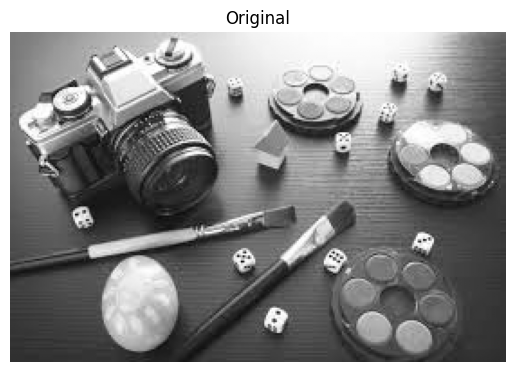

In [10]:
def show_image(image, title="Original"):
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")

soaps_image = plt.imread("objeto01.jpeg")

from skimage import color, filters
soaps_image = color.rgb2gray(soaps_image)

# Make the image grayscale
# Apply edge detection filters
edge_sobel = filters.sobel(soaps_image)

show_image(soaps_image)

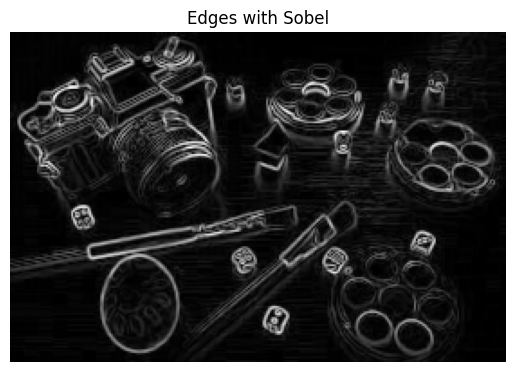

In [11]:
show_image(edge_sobel, 'Edges with Sobel')

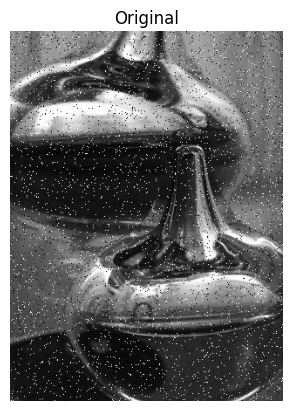

In [17]:
building_image = plt.imread("objeto03.jpeg")
building_image = color.rgb2gray(building_image)
show_image(building_image)


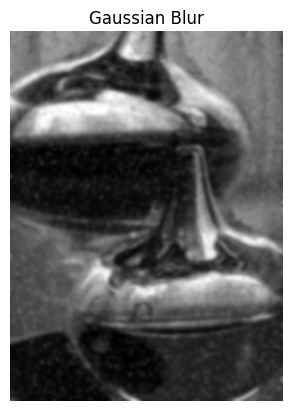

In [18]:
# Apply Filter
gaussian_image = filters.gaussian(building_image, sigma=2)
show_image(gaussian_image, 'Gaussian Blur')

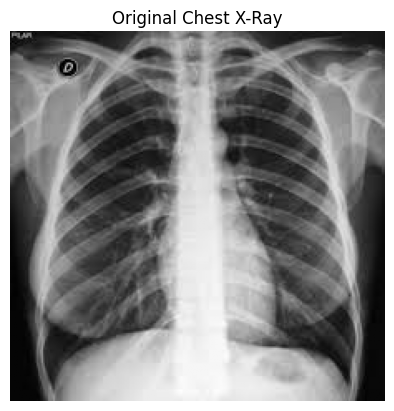

In [20]:
chest_image = plt.imread("objeto04.jpeg")
chest_image = color.rgb2gray(chest_image)
show_image(chest_image, 'Original Chest X-Ray')

(array([ 30.,   3.,  11.,  57.,  81., 590., 102., 234., 214., 379., 118.,
         76.,  66.,  62.,  72.,  76.,  81.,  81.,  98.,  99., 108., 139.,
        198., 187., 181., 196., 197., 241., 241., 258., 253., 258., 295.,
        284., 282., 254., 264., 258., 244., 260., 277., 262., 250., 267.,
        259., 289., 257., 264., 271., 266., 299., 304., 285., 327., 287.,
        277., 287., 298., 286., 281., 287., 265., 258.,   0., 273., 254.,
        246., 239., 266., 248., 267., 262., 266., 263., 251., 272., 260.,
        237., 239., 245., 236., 261., 250., 218., 247., 222., 267., 258.,
        245., 213., 223., 225., 239., 227., 216., 214., 226., 206., 224.,
        230., 223., 193., 213., 192., 205., 222., 193., 213., 192., 204.,
        197., 183., 206., 195., 211., 220., 198., 233., 259., 211., 244.,
        234., 243., 207., 236., 214., 248.,   0., 233., 239., 235., 197.,
        219., 237., 204., 216., 213., 245., 270., 209., 215., 203., 234.,
        208., 248., 240., 244., 228., 

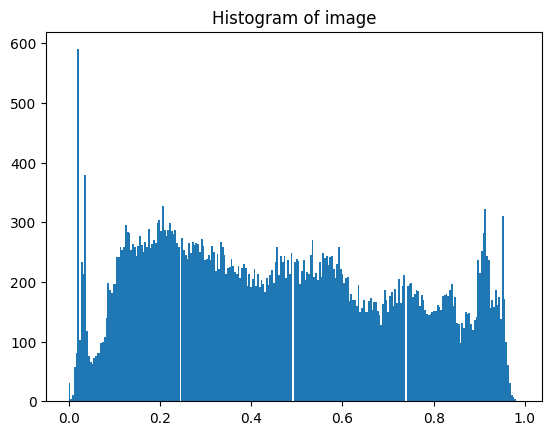

In [21]:
plt.title('Histogram of image')
plt.hist(chest_image.ravel(), bins=256)

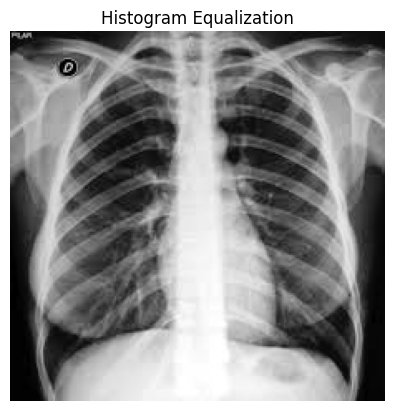

In [25]:
# Use histogram equalization to improve the constrast
xray_image_eq = exposure.equalize_hist(chest_image)
show_image(xray_image_eq, 'Histogram Equalization')

/usr/local/lib/python3.11/dist-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


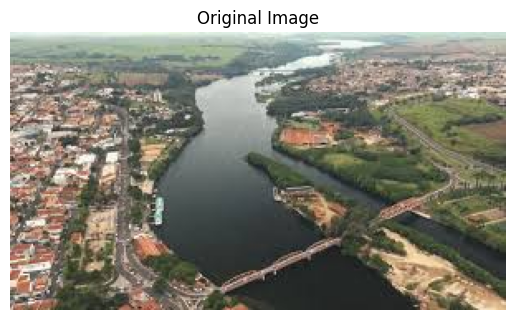

In [26]:
image_areial = plt.imread("objeto05.jpeg")
image_eq = exposure.equalize_hist(image_areial)
show_image(image_areial, 'Original Image')

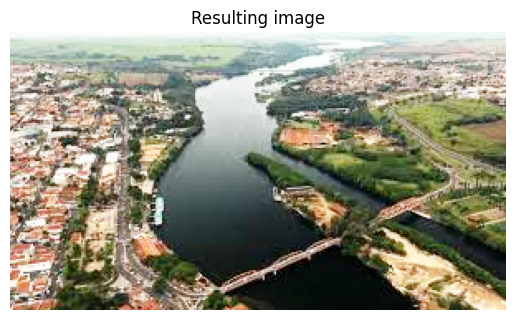

In [27]:
show_image(image_eq, 'Resulting image')

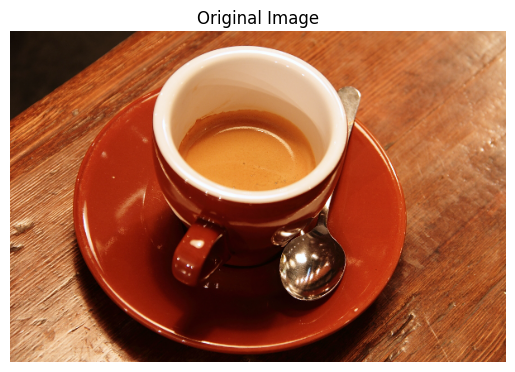

In [31]:
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)
show_image(original_image, 'Original Image')


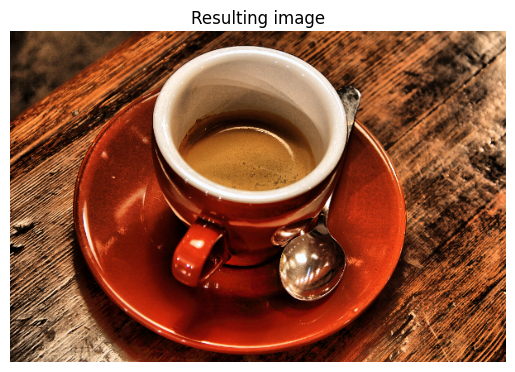

In [32]:
# Compare the original
show_image(adapthist_eq_image, 'Resulting image')

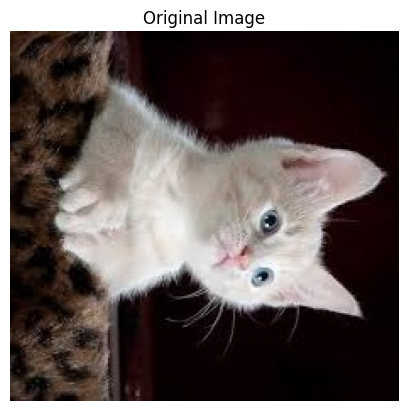

In [37]:
image_cat = plt.imread("objeto06.jpeg")
show_image(image_cat, 'Original Image')

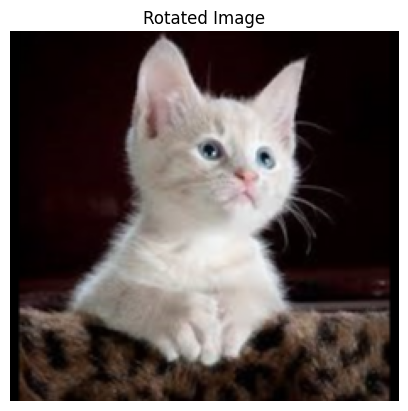

In [38]:
# Rotate the image 90 degress
rotated_image = rotate(image_cat, 90)
show_image(rotated_image, 'Rotated Image')

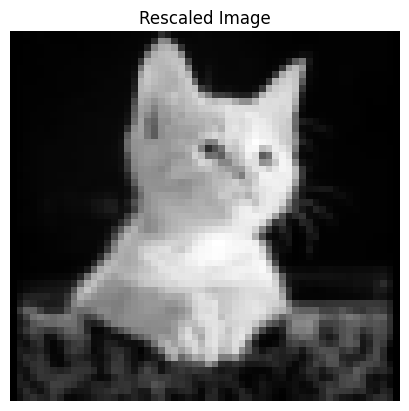

In [48]:
rescaled_with_aa = rescale(rotated_image, 1/4, anti_aliasing=True)
show_image(rescaled_with_aa, 'Rescaled Image')

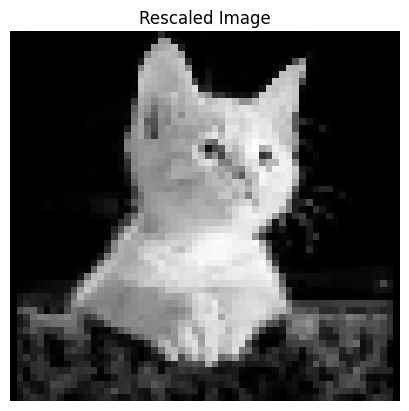

In [49]:
rescaled_without_aa = rescale(rotated_image, 1/4, anti_aliasing=False)
show_image(rescaled_without_aa, 'Rescaled Image')